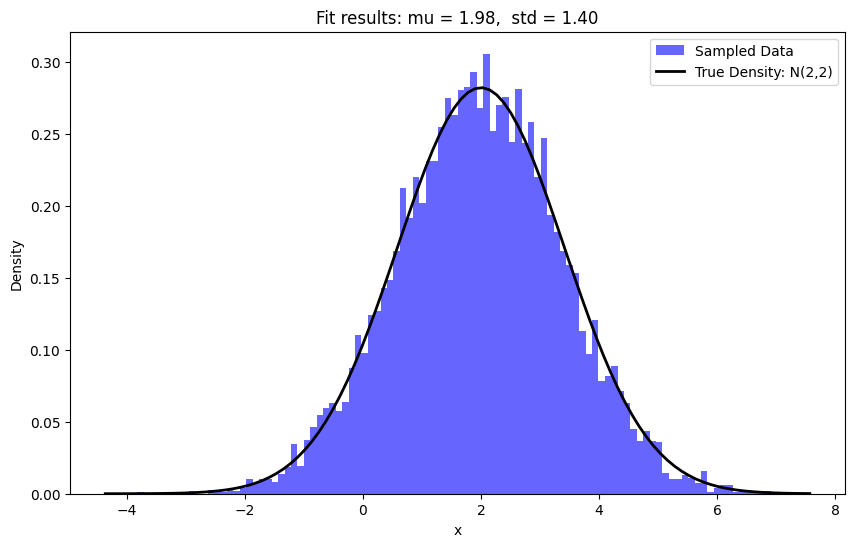

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Target probability density function p(x): Gaussian with mean=2, variance=2
def target_pdf(x):
    return norm.pdf(x, loc=2, scale=np.sqrt(2))

# Proposal distribution q(x'|x): Gaussian with mean=x, variance=1
def proposal(x):
    return np.random.normal(loc=x, scale=1)

# Metropolis-Hastings MCMC sampler
def mh_mcmc_sampler(initial_x, n_steps):
    samples = [initial_x]
    for _ in range(n_steps):
        x = samples[-1]
        x_prime = proposal(x)
        acceptance_ratio = target_pdf(x_prime) / target_pdf(x)
        # Accept x_prime with probability min(1, acceptance_ratio)
        if np.random.uniform(0, 1) < acceptance_ratio:
            samples.append(x_prime)
        else:
            samples.append(x)
    return np.array(samples)

# Initializations
initial_x = 0
n_steps = 10**4 + 100

# Run MH MCMC Sampler
samples = mh_mcmc_sampler(initial_x, n_steps)

# Plot Results
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=100, density=True, alpha=0.6, color='b', label="Sampled Data")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = target_pdf(x)
plt.plot(x, p, 'k', linewidth=2, label="True Density: N(2,2)")
title = "Fit results: mu = %.2f,  std = %.2f" % (samples.mean(), samples.std())
plt.title(title)
plt.legend()
plt.xlabel("x")
plt.ylabel("Density")
plt.show()